In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import math
import statistics
data_files = glob.glob(r'../Squircle experiment/data/.xlsx')
# Load the dataset
df = pd.DataFrame()
for i in range(len(data_files)):
    temp_df = pd.read_excel(data_files[i])
    df = pd.concat([df, temp_df])
df = df.drop(df.columns[df.columns.str.contains('Unnamed', case=False)], axis=1)
# select only the main task
df = df.loc[df['task']=='experiment']

# extracting sample size
#n = len(set(df.pt_num))

AttributeError: Can only use .str accessor with string values!

In [13]:
#df = pd.read_excel(r'../Squircle experiment/data/results_999.xlsx')
df = pd.read_excel(r'../Squircle experiment/data/results_27.xlsx')



In [14]:
df_acc = df[(df['difficulty'] != 'Control') & (df['acc'] != 'Control')]

# Convert 'acc' column to 1 for True and 0 for False
df_acc['acc'] = df_acc['acc'].astype(int)

# Calculate average accuracy and reaction time by difficulty level
avg_stats = df_acc.groupby(['difficulty', 'true_value'] ).agg({'acc': 'mean', 'rt': 'mean'}).reset_index()
print(avg_stats)

  difficulty true_value       acc        rt
0       Easy       Blue  0.900000  0.391885
1       Easy        Red  0.870229  0.354158
2       Hard       Blue  0.741667  0.444028
3       Hard        Red  0.716667  0.385259
4     Medium       Blue  0.823077  0.423622
5     Medium        Red  0.775194  0.379864


C:\Users\veoni\AppData\Local\Temp\ipykernel_24788\1903629812.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc['acc'] = df_acc['acc'].astype(int)


C:\Users\veoni\AppData\Local\Temp\ipykernel_24788\2679731611.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc['acc'] = df_acc['acc'].astype(int)
C:\Users\veoni\anaconda3\envs\DLAB\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\envs\DLAB\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists wh

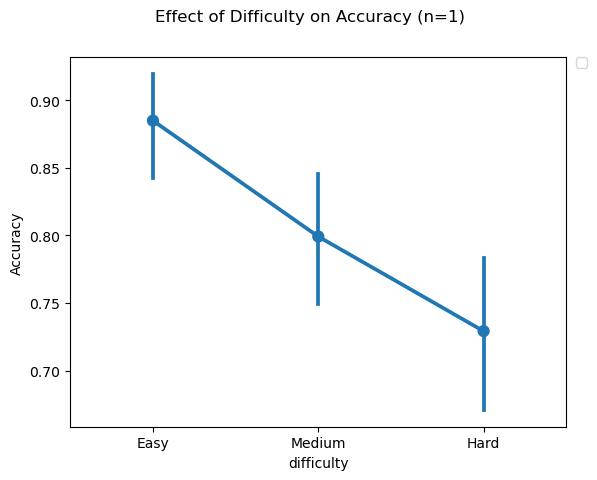

C:\Users\veoni\anaconda3\envs\DLAB\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\envs\DLAB\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


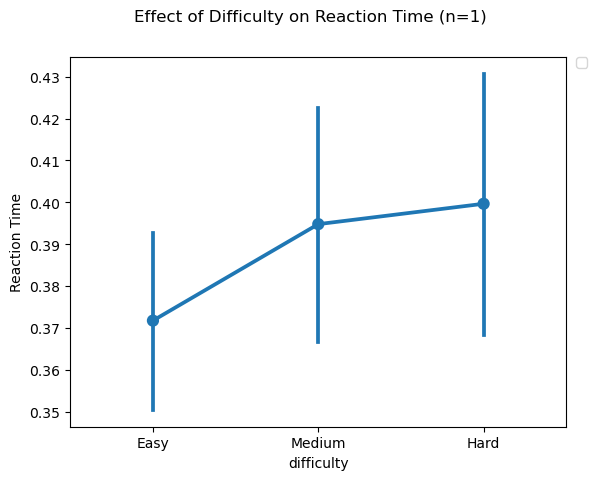

In [15]:
import pandas as pd

# Load the dataset
# Exclude rows where 'control' appears in either 'difficulty' or 'acc' column
n= 1

#df_acc = df[(df['difficulty'] != 'Control') & (df['acc'] != 'Control')]



# Convert 'acc' column to 1 for True and 0 for False
df_acc['acc'] = df_acc['acc'].astype(int)

# Drop the 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1, errors='ignore')

# checking the effect of masking
# for each measure of performance separately
for dv in ['acc', 'rt']:
    if dv == 'rt':
        data = df[df['acc'] == 1]  # only take correct trials for RT
    elif dv == 'acc':
        data = df_acc

    # Rest of your analysis code
    plt.figure()
    plot = sns.pointplot(
        data=data,
        y=dv,
        x='difficulty',
        order=['Easy', 'Medium', 'Hard'],
        join=True

    )
    if dv == 'acc':
        plt.ylabel("Accuracy")
        plt.suptitle("Effect of Difficulty on Accuracy (n={})".format(n))
    elif dv == 'rt':
        plt.ylabel("Reaction Time")
        plt.suptitle("Effect of Difficulty on Reaction Time (n={})".format(n))
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()


C:\Users\veoni\anaconda3\envs\DLAB\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\veoni\anaconda3\envs\DLAB\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


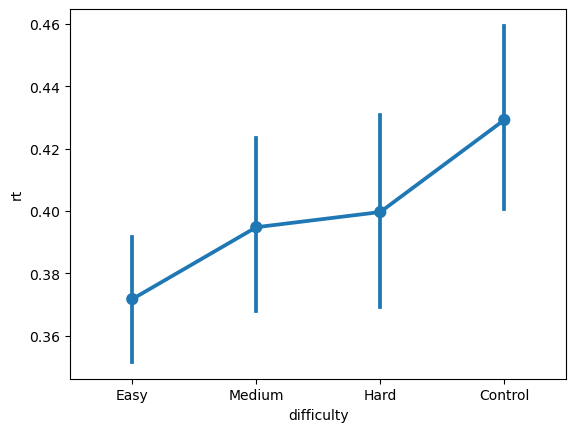

In [16]:
plt.figure()
plot = sns.pointplot(
    data=df[(df['acc'] == True) | (df['acc'] == 'Control')],
    y='rt',
    x='difficulty',
    order=['Easy', 'Medium', 'Hard', "Control"],
    join=True

)

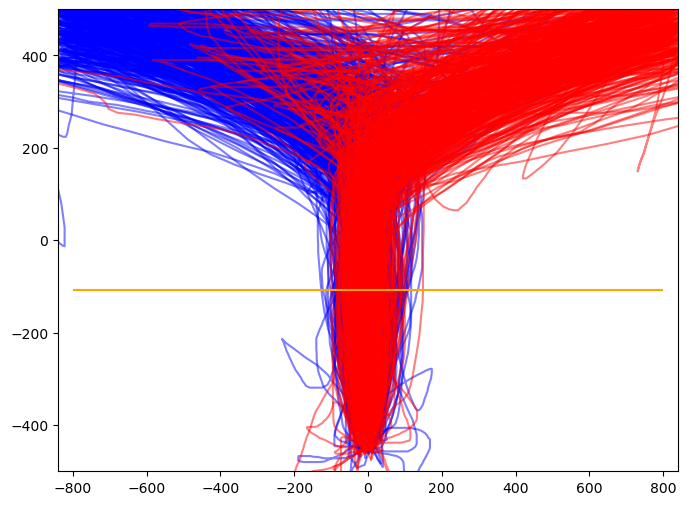

In [34]:
## # Assuming 'traj_record' is the column containing strings of tuples in your DataFrame
#df['traj_record'] = df['traj_record'].apply(lambda x: ast.literal_eval(x))
error_tri = []
import ast
#df['traj_record'][i] = ast.literal_eval(df['traj_record'][i])
# Assuming 'traj_record' is the column containing strings of tuples in your DataFrame
df = df[(df['block_number'] != 'Training')]
"""
for i in range(len(df)):
    if i == 999:
        pass
    try:
        df['traj_record'][i] = ast.literal_eval(df['traj_record'][i])
    except (ValueError, SyntaxError) as e:
        error_tri.append(i)
        print(f"Error at index {i}: {e}")
        continue
"""
# Now, 'traj_record' column contains lists of tuples
    
# Now, 'traj_record' column contains lists of tuples
df_blue = df[df['choice'] == 'Blue']
df_red = df[df['choice'] == 'Red']
df_blue = df_blue.reset_index()
df_red = df_red.reset_index()
plt.figure(figsize=(8, 6))
for z in range(len(df_blue)):
#    if z == 88 or z == 99 or z == 127 or z == 195 or z == 210 or z == 247 or z == 279 or z ==339 or z == 457:
#        continue
    x_coords = [pos[0] for pos in df_blue['traj_record'][z]]
    y_coords = [pos[1] for pos in df_blue['traj_record'][z]]

    plt.plot(x_coords, y_coords, label='Mouse Trajectory', color='blue',alpha = 0.5)

for b in range(len(df_red)):
    x_red_coords = [pos[0] for pos in df_red['traj_record'][b]]
    y_red_coords = [pos[1] for pos in df_red['traj_record'][b]]
    
    # Create a new figure
   
    
    # Plot the mouse trajectory
   
    plt.plot(x_red_coords, y_red_coords, label='Mouse Trajectory', color='red', alpha = 0.5)
    #plt.scatter(x_coords, y_coords, color='red', s=4, label='Mouse Positions')
    
    
    # Add labels and title
    #plt.xlabel('X Position')
    #plt.ylabel('Y Position')
    #plt.title('Mouse Trajectory')
    
    # Set x-axis limits to show the left side of the screen
    
plt.xlim(-840, 840)
plt.ylim(-500, 500)  # Assuming max(x_coords) is the rightmost position
plt.hlines(-108, xmin = -800 , xmax =800, colors= 'orange')
# Add legend
#plt.legend()

# Show the plot
plt.show()


In [36]:
df_blue['traj_record'][0]

[(0, -450),
 (0, -450),
 (0, -450),
 (0, -450),
 (0, -450),
 (0, -450),
 (0, -450),
 (0, -450),
 (0, -450),
 (0, -450),
 (0, -450),
 (0, -450),
 (0, -451),
 (0, -451),
 (0, -451),
 (0, -451),
 (0, -452),
 (0, -452),
 (0, -452),
 (-1, -455),
 (-1, -455),
 (-1, -455),
 (-1, -455),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-2, -456),
 (-1, -456),
 (-1, -456),
 (-1, -456),
 (-1, -456),
 (2, -456),
 (2, -456),
 (2, -456),
 (2, -456),
 (4, -457),
 (4, -457),
 (4, -457),
 (4, -457),
 (9, -458),
 (9, -458),
 (9, -458),
 (9, -458),
 (12, -458),
 (12, -458),
 (12

In [ ]:
mean_calc = []
for t in range(len(df)):
    mean_calc.append(len(df['traj_record'][t]))
statistics.mean(mean_calc)

In [ ]:
unique_val = []
for t in range(len(df)):
    unique_val.append(len(set(df['traj_record'][t])))
statistics.mean(unique_val)

In [ ]:
round(len(df[df['true_value'] == "Control"]) / len(df),2)

In [ ]:
(len(set(df['traj_record'][t])))